# PANDAS recap 
- sklearn California Housing df
- [Youtube Tutorial](https://www.youtube.com/watch?v=b0j3R2ovpm0&list=PLqrmzsjOpq5jRH3uPWix4H6Ilc0NdJCPD&index=3&t=0s)

**Series**
- 1) Timestamps and DatetimeIndex.
- 2) Time-Series processing - combining different ts.

**DataFrames**
- 1) DF constructor example
- 2) Boolean Addressing
- 3) **boolean indexing as variable** -> efficient data retrieval
- 4) df manipulation

**Real Example**
- 1) stylign notebook
- 2) list comprehension
- 3) slice data based on index
- 4) boolean indexing to retrieve specific data values
- 5) Advanced Conditional Indexing
- 6) GroupBy

In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Pandas Series - every element of same dtype
#### Indexing for data selection

In [48]:
index_series = pd.Series(['A','B','C'])
s1 = pd.Series(range(3), index = index_series)
s1

A    0
B    1
C    2
dtype: int64

#### Assignemnt 

In [49]:
s1['A'] = 1000
s1

A    1000
B       1
C       2
dtype: int64

#### Slicing

In [50]:
s1['B':'C']

B    1
C    2
dtype: int64

#### DatetimeIndex 

In [59]:
dates = pd.date_range('1/01/2000', periods=10, freq='W')
dates

DatetimeIndex(['2000-01-02', '2000-01-09', '2000-01-16', '2000-01-23',
               '2000-01-30', '2000-02-06', '2000-02-13', '2000-02-20',
               '2000-02-27', '2000-03-05'],
              dtype='datetime64[ns]', freq='W-SUN')

In [61]:
values = range(len(dates))
s2 = pd.Series(values,index=dates)
s2

2000-01-02    0
2000-01-09    1
2000-01-16    2
2000-01-23    3
2000-01-30    4
2000-02-06    5
2000-02-13    6
2000-02-20    7
2000-02-27    8
2000-03-05    9
Freq: W-SUN, dtype: int64

In [62]:
s2['2000-02-13']

6

#### slicing series based on timestamps

In [63]:
s2[dates[3:5]]

2000-01-23    3
2000-01-30    4
Freq: W-SUN, dtype: int64

#### computational indexing

In [67]:
ts = dates[9]
ts # timestamp of specific date point

Timestamp('2000-03-05 00:00:00', freq='W-SUN')

In [77]:
s2[ts: ts+3] # look for 3 days in the future

C:\Users\09ale\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  """Entry point for launching an IPython kernel.


2000-03-05    9
Freq: W-SUN, dtype: int64

#### assignment

In [90]:
s2[dates[1:4]] = 'Alex Rules'
s2

2000-01-02             0
2000-01-09    Alex Rules
2000-01-16    Alex Rules
2000-01-23    Alex Rules
2000-01-30             4
2000-02-06             5
2000-02-13             6
2000-02-20             7
2000-02-27             8
2000-03-05             9
Freq: W-SUN, dtype: object

### Time-Series Processing
#### merge 2 time series 

In [83]:
# Timeseries 1
dates_offset = pd.date_range('4/26/15',periods=10,freq='12H')
dates_offset

DatetimeIndex(['2015-04-26 00:00:00', '2015-04-26 12:00:00',
               '2015-04-27 00:00:00', '2015-04-27 12:00:00',
               '2015-04-28 00:00:00', '2015-04-28 12:00:00',
               '2015-04-29 00:00:00', '2015-04-29 12:00:00',
               '2015-04-30 00:00:00', '2015-04-30 12:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [85]:
# base ts
s_offset = pd.Series(range(len(dates_offset)), index=dates_offset)
s_offset = s_offset * 1000 # modify values
s_offset

2015-04-26 00:00:00       0
2015-04-26 12:00:00    1000
2015-04-27 00:00:00    2000
2015-04-27 12:00:00    3000
2015-04-28 00:00:00    4000
2015-04-28 12:00:00    5000
2015-04-29 00:00:00    6000
2015-04-29 12:00:00    7000
2015-04-30 00:00:00    8000
2015-04-30 12:00:00    9000
Freq: 12H, dtype: int64

In [86]:
# Combine 2 timeseries 
pd.concat([s_offset,s2]).sort_index() # sorts index

2000-01-02 00:00:00             0
2000-01-09 00:00:00    Alex Rules
2000-01-16 00:00:00    Alex Rules
2000-01-23 00:00:00    Alex Rules
2000-01-30 00:00:00             4
2000-02-06 00:00:00             5
2000-02-13 00:00:00             6
2000-02-20 00:00:00             7
2000-02-27 00:00:00             8
2000-03-05 00:00:00             9
2015-04-26 00:00:00             0
2015-04-26 12:00:00          1000
2015-04-27 00:00:00          2000
2015-04-27 12:00:00          3000
2015-04-28 00:00:00          4000
2015-04-28 12:00:00          5000
2015-04-29 00:00:00          6000
2015-04-29 12:00:00          7000
2015-04-30 00:00:00          8000
2015-04-30 12:00:00          9000
dtype: object

#### Timestamps allow for computations

In [60]:
dates[1]+100 # element 1 + 100 days 

C:\Users\09ale\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  """Entry point for launching an IPython kernel.


Timestamp('2001-12-09 00:00:00', freq='W-SUN')

## DataFrames - elements of mixed dtypes

#### 1 of many df constructors

In [125]:
dates = pd.date_range(20/20/2020, periods=10, freq='W')
dates

c0 = range(len(dates)) # col1
c1 = range(100, 100+len(dates))
d = {'col0':pd.Series(c0,index=dates),'col1':pd.Series(c1,index=dates)}
df = pd.DataFrame(d)
df

,col0,col1
1970-01-04,0,100
1970-01-11,1,101
1970-01-18,2,102
1970-01-25,3,103
1970-02-01,4,104
1970-02-08,5,105
1970-02-15,6,106
1970-02-22,7,107
1970-03-01,8,108
1970-03-08,9,109


#### Slicing

In [97]:
df.loc['1970-02-01'] # get values of both columns for specific index

col0      4
col1    104
Name: 1970-02-01 00:00:00, dtype: int64

In [98]:
df.loc['1970-02-01']['col1'] # get value for specific column 1

104

#### Add values

In [100]:
np.random.seed(1)
df['rand'] = np.random.randn(len(df))
df

,col0,col1,rand
1970-01-04,0,100,1.624345
1970-01-11,1,101,-0.611756
1970-01-18,2,102,-0.528172
1970-01-25,3,103,-1.072969
1970-02-01,4,104,0.865408
1970-02-08,5,105,-2.301539
1970-02-15,6,106,1.744812
1970-02-22,7,107,-0.761207
1970-03-01,8,108,0.319039
1970-03-08,9,109,-0.249370


#### Operations over Columns

In [102]:
df['rand']-df['col1'] # results in a series so can manupulate (eg sum())

1970-01-04    -98.375655
1970-01-11   -101.611756
1970-01-18   -102.528172
1970-01-25   -104.072969
1970-02-01   -103.134592
1970-02-08   -107.301539
1970-02-15   -104.255188
1970-02-22   -107.761207
1970-03-01   -107.680961
1970-03-08   -109.249370
Freq: W-SUN, dtype: float64

#### Boolean Addressing

In [104]:
df < 0.0 # returns True for value satisfying condition

# More specific 
df['col1']<0.0

1970-01-04    False
1970-01-11    False
1970-01-18    False
1970-01-25    False
1970-02-01    False
1970-02-08    False
1970-02-15    False
1970-02-22    False
1970-03-01    False
1970-03-08    False
Freq: W-SUN, Name: col1, dtype: bool

#### Boolean addressing within index

In [106]:
df[df['rand'] < 0.0] # returns value below 0

,col0,col1,rand
1970-01-11,1,101,-0.611756
1970-01-18,2,102,-0.528172
1970-01-25,3,103,-1.072969
1970-02-08,5,105,-2.301539
1970-02-22,7,107,-0.761207
1970-03-08,9,109,-0.249370


#### Compound boolean queries 

In [112]:
(df['col0']>5) & (df['rand']<0.0)

1970-01-04    False
1970-01-11    False
1970-01-18    False
1970-01-25    False
1970-02-01    False
1970-02-08    False
1970-02-15    False
1970-02-22     True
1970-03-01    False
1970-03-08     True
Freq: W-SUN, dtype: bool

#### **EFFICIENCY**

In [117]:
# save boolean traversing in a variable 
bool_idx = (df['col0']>5) & (df['rand']<0.0)
bool_idx   

1970-01-04    False
1970-01-11    False
1970-01-18    False
1970-01-25    False
1970-02-01    False
1970-02-08    False
1970-02-15    False
1970-02-22     True
1970-03-01    False
1970-03-08     True
Freq: W-SUN, dtype: bool

In [119]:
df[bool_idx]  # returns the slice where condition = true

,col0,col1,rand
1970-02-22,7,107,-0.761207
1970-03-08,9,109,-0.249370


### DF manipulation

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 1970-01-04 to 1970-03-08
Freq: W-SUN
Data columns (total 3 columns):
col0    10 non-null int64
col1    10 non-null int64
rand    10 non-null float64
dtypes: float64(1), int64(2)
memory usage: 640.0 bytes


In [121]:
df[bool_idx].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 1970-02-22 to 1970-03-08
Freq: 2W-SUN
Data columns (total 3 columns):
col0    2 non-null int64
col1    2 non-null int64
rand    2 non-null float64
dtypes: float64(1), int64(2)
memory usage: 64.0 bytes


In [126]:
del df['col0'] # delets a column

## Real Data Example

In [149]:
# Import Dataset
## returns data/target dictionary 
### must create a df
from sklearn import datasets
data = datasets.fetch_california_housing()# datasets.load_iris()
print(data.keys())
#print(data.DESCR) # dataset description
df =  pd.concat([pd.DataFrame(data.data,columns=data.feature_names),\
                 pd.DataFrame(data.target,columns=['Target'])],axis=1)

df.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Observing data from shell command 

In [127]:
df.sort_index(inplace=True)

#### Styling notebook

In [148]:
# Depreciated, row and column indexing
df.ix[:3,['AveBedrms','Population','AveOccup']]

C:\Users\09ale\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,AveBedrms,Population,AveOccup
0,1.023810,322.0,2.555556
1,0.971880,2401.0,2.109842
2,1.073446,496.0,2.802260
3,1.073059,558.0,2.547945


#### List comprehension to find word 

In [165]:
words = [c for c in df.columns if 'tude' in c]
words

['Latitude', 'Longitude']

#### slice data based on index

In [166]:
df[words].head(2)

,Latitude,Longitude
0,37.88,-122.23
1,37.86,-122.22


In [168]:
# add feature to list and slice 
words.append('MedInc')
df[words].head(3)

,Latitude,Longitude,MedInc,MedInc
0,37.88,-122.23,8.3252,8.3252
1,37.86,-122.22,8.3014,8.3014
2,37.85,-122.24,7.2574,7.2574


#### Boolean Indexing -> Finding data of specific value 
- the size of the boolean index is the same as the original data

In [174]:
# find instances where HouseAge = 26
age_26 = df['HouseAge'] == 26
print (df.HouseAge.shape, age_26.shape)
age_26[:5]

(20640,) (20640,)


0    False
1    False
2    False
3    False
4    False
Name: HouseAge, dtype: bool

#### Slicing data using Boolean indexing

In [189]:
df_26 = df[age_26]
df_26

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
70,1.7719,26.0,6.047244,1.196850,392.0,3.086614,37.81,-122.29,0.825
112,3.0233,26.0,3.253081,0.982744,1749.0,1.437141,37.82,-122.25,2.550
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20,3.512
321,1.9479,26.0,4.267327,0.980198,984.0,3.247525,37.76,-122.19,0.858
360,5.3700,26.0,6.127580,0.921201,1222.0,2.292683,37.76,-122.13,2.754
...,...,...,...,...,...,...,...,...,...
20576,3.4187,26.0,5.230769,0.942308,194.0,3.730769,38.83,-122.00,0.984
20585,3.0486,26.0,4.756410,0.948718,689.0,2.944444,38.68,-122.04,0.836
20605,1.8355,26.0,4.424051,0.995253,2017.0,3.191456,39.12,-121.58,0.612
20612,1.4934,26.0,5.157303,1.082397,761.0,2.850187,39.08,-121.56,0.483


#### Finding max value by index

In [176]:
df[age_26].idxmax() # finds max value and associated index for each feature

MedInc        18504
HouseAge         70
AveRooms      20094
AveBedrms     20094
Population     7361
AveOccup      16420
Latitude      18855
Longitude     12458
Target         4049
dtype: int64

In [184]:
df.iloc[df.index[18504]] # confirm that max vakye fir MedInx at said row

MedInc         15.0001
HouseAge       26.0000
AveRooms       12.5000
AveBedrms       1.2500
Population     17.0000
AveOccup        4.2500
Latitude       37.1300
Longitude    -121.9600
Target          4.0000
Name: 18504, dtype: float64

 #### Advanced Conditional Indexing

In [195]:
# 2 conditions
df_26[ (df_26['Population']<300) & (df_26['AveRooms']>6)]  
                    # OR 
df_26[ (df_26['Population']<300) | (df_26['AveRooms']>6)]  

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
70,1.7719,26.0,6.047244,1.196850,392.0,3.086614,37.81,-122.29,0.825
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20,3.512
360,5.3700,26.0,6.127580,0.921201,1222.0,2.292683,37.76,-122.13,2.754
581,5.4834,26.0,6.619835,0.985537,1411.0,2.915289,37.72,-122.07,2.952
645,7.9120,26.0,7.209068,0.992443,1030.0,2.594458,37.72,-122.13,3.673
...,...,...,...,...,...,...,...,...,...
20472,4.5673,26.0,6.294964,1.021583,962.0,3.460432,34.26,-118.76,1.904
20473,5.4038,26.0,6.028125,0.915625,1067.0,3.334375,34.26,-118.76,2.221
20474,5.4787,26.0,7.068000,1.060000,1040.0,4.160000,34.26,-118.75,1.981
20490,5.4770,26.0,6.450413,0.876033,817.0,3.376033,34.27,-118.68,2.091


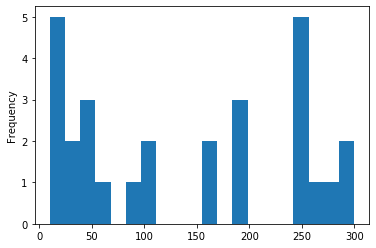

In [196]:
df_26['Population'].plot(kind='hist',bins=20,range=(10,300))

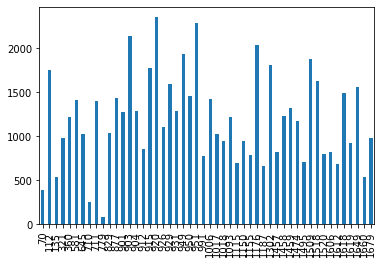

In [210]:
# Not very effective
df_26['Population'][:50].plot(kind='bar')

#### GroupBy
- Level 0 -> rows 
- Level 1 -> columns

In [212]:
grpby = df_26[:50].groupby(level=0)

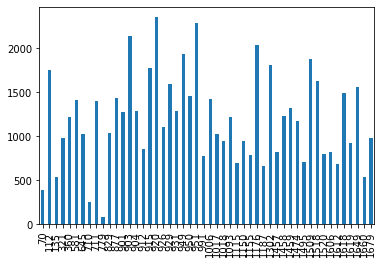

In [209]:
grpby['Population'].mean().plot(kind='bar')

======================   END   =====================